In [1]:
!nvidia-smi
!python --version

Thu Aug 15 10:34:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 555.58.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0             16W /   80W |       8MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Implementing the Bigram Language Model using the nltk package

In [2]:
# Using the Reuters corpus, a collection of news documents used for natural language processing tasks.
# Using the Punkt tokenizer

# Importing the required packages
import nltk
from nltk.corpus import reuters
from nltk import bigrams
from collections import Counter, defaultdict

# Downloading the reuter dataset and punkt tokenizer
# nltk.data.path.append("/home/asa/nltk_data")
# nltk.download("reuters")
# nltk.download("punkt")

In [3]:
# default structure for the model
bigram_model = defaultdict( lambda : defaultdict( lambda : 0 ))
print(bigram_model)

defaultdict(<function <lambda> at 0x7aadcc216710>, {})


In [4]:
# Counting the co-occurence
for sentence in reuters.sents():
    for w1, w2 in bigrams( sentence, pad_right=True, pad_left=True ):
        bigram_model[w1][w2] += 1

In [5]:
# Transforms the counts to probability
for w1 in bigram_model:
    total_count = float(sum(bigram_model[w1].values()))
    for w2 in bigram_model[w1]:
        bigram_model[w1][w2] /= total_count                # Finding the probability

In [6]:
# bigram_model prediction made for a word
print(dict(bigram_model['today']))

{'.': 0.18636363636363637, 'to': 0.0659090909090909, "'": 0.10681818181818181, 'and': 0.025, 'as': 0.013636363636363636, ',': 0.16363636363636364, 'with': 0.007575757575757576, 'by': 0.020454545454545454, 'when': 0.0030303030303030303, 'on': 0.011363636363636364, 'recommended': 0.0007575757575757576, 'he': 0.005303030303030303, 'its': 0.0022727272727272726, 'for': 0.01893939393939394, 'De': 0.0007575757575757576, 'European': 0.0007575757575757576, 'described': 0.0007575757575757576, 'the': 0.013636363636363636, ',"': 0.007575757575757576, 'they': 0.0015151515151515152, 'issued': 0.0015151515151515152, 'being': 0.0007575757575757576, 'that': 0.03333333333333333, 'quoted': 0.004545454545454545, 'it': 0.015909090909090907, '."': 0.003787878787878788, 'show': 0.0015151515151515152, 'of': 0.009848484848484848, 'at': 0.02878787878787879, 'through': 0.0015151515151515152, 'reported': 0.015151515151515152, '(': 0.0007575757575757576, 'said': 0.015909090909090907, 'in': 0.01893939393939394, 'we

# Implementation of the Trigram Language Model using the nltk package

In [7]:
# Importing the required package
import nltk
from nltk.corpus import reuters
from nltk import trigrams
from collections import Counter, defaultdict

# Downloading the corpus and tokenizer model
# nltk.download("reuters")
# nltk.download("punkt")

In [8]:
# default template for the model
trigrams_model = defaultdict( lambda: defaultdict( lambda: 0 ))

# Counting the co-occurrence
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams( sentence, pad_right=True, pad_left=True ):
        trigrams_model[( w1, w2 )][w3] += 1

In [9]:
# Tranforming the count to probability
for w1_w2 in trigrams_model:
    total_count = float(sum(trigrams_model[w1_w2].values()))
    for w3 in trigrams_model[w1_w2]:
        trigrams_model[w1_w2][w3] /= total_count

In [10]:
# Display the prediction made by the trigrams model
print(dict(trigrams_model['They', 'are']))

{'giving': 0.04, 'to': 0.04, 'a': 0.04, 'not': 0.04, 'supported': 0.04, 'more': 0.04, 'particularly': 0.04, 'non': 0.04, 'like': 0.04, 'matters': 0.04, 'Integrated': 0.04, 'trying': 0.04, 'making': 0.04, 'always': 0.04, 'aiming': 0.04, 'going': 0.04, 'using': 0.04, 'mainly': 0.04, 'sceptical': 0.08, 'much': 0.04, 'partly': 0.04, ',': 0.04, 'two': 0.04, 'now': 0.04}


# Bigram implementation from Scratch

In [11]:
# Preprocessing the Input corpus
# Implementing the character-level tokenisation
# Predict the next character based on the previous character

input_corpus = open('./dataset.txt', 'r', encoding='utf-8').read().split()

# Cleaning the input corpus
input_corpus = list([ word.strip().replace('\n', '') for word in input_corpus if word.strip().replace('\n', '') != '' ])

print("Some of the sample words in the sentences : ")
print(input_corpus[:10])

print("\nDetails about the Corpus : ")
print(f"Total number of words -> {len(input_corpus)}")
print(f"Shortest word length -> {min([ len(w) for w in input_corpus ])}")
print(f"Largest word length -> {max([ len(w) for w in input_corpus ])}", end="\n\n")

# Counting the bigrams pair in the corpus
# Also adding a indication to idicate the start and end of the word
bigrams_pairs = dict()
for word in input_corpus:
    word = [ '.' ] + list(word) + [ '.' ]
    for c1, c2 in zip(word[:], word[1:]):
        # print(f"Input character : {c1} => Target charater : {c2}")
        bg_pair = ( c1, c2 )
        bigrams_pairs[bg_pair] = bigrams_pairs.get(bg_pair, 0) + 1

print("The bigram pairs are : ")
print(bigrams_pairs)

Some of the sample words in the sentences : 
['He', 'Who', 'Served', 'By', 'Ray', 'Cummings', 'This', 'surely', 'was', 'the']

Details about the Corpus : 
Total number of words -> 7204
Shortest word length -> 1
Largest word length -> 18

The bigram pairs are : 
{('.', 'H'): 148, ('H', 'e'): 81, ('e', '.'): 1276, ('.', 'W'): 21, ('W', 'h'): 13, ('h', 'o'): 93, ('o', '.'): 290, ('.', 'S'): 35, ('S', 'e'): 4, ('e', 'r'): 503, ('r', 'v'): 9, ('v', 'e'): 153, ('e', 'd'): 376, ('d', '.'): 854, ('.', 'B'): 108, ('B', 'y'): 1, ('y', '.'): 434, ('.', 'R'): 16, ('R', 'a'): 3, ('a', 'y'): 80, ('.', 'C'): 6, ('C', 'u'): 2, ('u', 'm'): 38, ('m', 'm'): 31, ('m', 'i'): 53, ('i', 'n'): 640, ('n', 'g'): 326, ('g', 's'): 16, ('s', '.'): 848, ('.', 'T'): 234, ('T', 'h'): 93, ('h', 'i'): 311, ('i', 's'): 232, ('.', 's'): 475, ('s', 'u'): 48, ('u', 'r'): 99, ('r', 'e'): 392, ('e', 'l'): 101, ('l', 'y'): 139, ('.', 'w'): 524, ('w', 'a'): 266, ('a', 's'): 273, ('.', 't'): 932, ('t', 'h'): 745, ('h', 'e'): 84

In [12]:
# Selecting the most frequent bigrams in the corpus
sorted_bigrams_pairs = sorted(bigrams_pairs.items(), key= lambda item : item[1], reverse=True)
print("The sorted list based on the most frequent occurrence of the bigrams : ")
print(sorted_bigrams_pairs)

The sorted list based on the most frequent occurrence of the bigrams : 
[(('e', '.'), 1276), (('.', 't'), 932), (('d', '.'), 854), (('s', '.'), 848), (('h', 'e'), 845), (('t', '.'), 752), (('t', 'h'), 745), (('i', 'n'), 640), (('.', 'a'), 598), (('.', 'h'), 583), (('.', '.'), 552), (('.', 'w'), 524), (('e', 'r'), 503), (('.', 's'), 475), (('y', '.'), 434), (('a', 'n'), 413), ((',', '.'), 403), (('n', '.'), 403), (('r', 'e'), 392), (('e', 'd'), 376), (('o', 'r'), 361), (('o', 'u'), 345), (('n', 'd'), 338), (('n', 'g'), 326), (('.', 'o'), 322), (('r', '.'), 316), (('h', 'i'), 311), (('o', '.'), 290), (('.', 'i'), 290), (('h', 'a'), 281), (('t', 'o'), 277), (('.', '"'), 277), (('g', '.'), 276), (('i', 't'), 275), (('a', 's'), 273), (('e', 'n'), 271), (('o', 'n'), 267), (('w', 'a'), 266), (('s', 't'), 265), (('.', 'b'), 263), (('o', 'o'), 251), (('a', 't'), 244), (('a', 'r'), 237), (('.', 'c'), 235), (('.', 'T'), 234), (('i', 's'), 232), (('.', 'm'), 230), (('.', 'f'), 229), (('r', 'y'), 2

In [13]:
# Visualising the dataset

# matplotlib doesn't recognize text, we'll convert our characters into integer representation.
# This process is known as encoding ( str ---> int )
input_corpus_sentence = open('./dataset.txt', 'r', encoding='utf-8').read()

# Cleaning the input corpus
input_corpus_sentence = [word.strip().replace('\n', '') for word in input_corpus_sentence if word.strip().replace('\n', '') != '']

# Finding all the unique characters
character_set = sorted(set(input_corpus_sentence))
print("Character set : ", end="")
print(character_set, end="\n\n")
print(f"Total number of distinct characters : {len(character_set)}")

Character set : ['!', '"', "'", '*', ',', '-', '.', '1', '2', '4', '5', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Total number of distinct characters : 68


In [14]:
str_to_int = dict([ (character, index) for index, character in enumerate(character_set)  ])
int_to_str = dict([ (int(str_to_int[character]), character) for character in str_to_int ])

print("The dict which contain the character mapped to the integer(index) : ")
print(str_to_int, end="\n\n")

print("The dict which contain the integer mapped to the character : ")
print(int_to_str)

The dict which contain the character mapped to the integer(index) : 
{'!': 0, '"': 1, "'": 2, '*': 3, ',': 4, '-': 5, '.': 6, '1': 7, '2': 8, '4': 9, '5': 10, '9': 11, ':': 12, ';': 13, '?': 14, 'A': 15, 'B': 16, 'C': 17, 'D': 18, 'E': 19, 'F': 20, 'G': 21, 'H': 22, 'I': 23, 'J': 24, 'K': 25, 'L': 26, 'M': 27, 'N': 28, 'O': 29, 'P': 30, 'Q': 31, 'R': 32, 'S': 33, 'T': 34, 'U': 35, 'V': 36, 'W': 37, 'Y': 38, '[': 39, ']': 40, '_': 41, 'a': 42, 'b': 43, 'c': 44, 'd': 45, 'e': 46, 'f': 47, 'g': 48, 'h': 49, 'i': 50, 'j': 51, 'k': 52, 'l': 53, 'm': 54, 'n': 55, 'o': 56, 'p': 57, 'q': 58, 'r': 59, 's': 60, 't': 61, 'u': 62, 'v': 63, 'w': 64, 'x': 65, 'y': 66, 'z': 67}

The dict which contain the integer mapped to the character : 
{0: '!', 1: '"', 2: "'", 3: '*', 4: ',', 5: '-', 6: '.', 7: '1', 8: '2', 9: '4', 10: '5', 11: '9', 12: ':', 13: ';', 14: '?', 15: 'A', 16: 'B', 17: 'C', 18: 'D', 19: 'E', 20: 'F', 21: 'G', 22: 'H', 23: 'I', 24: 'J', 25: 'K', 26: 'L', 27: 'M', 28: 'N', 29: 'O', 30: 

In [15]:
# To optimise your model let's use the torch to store the bigrams pairs
import torch

# Checking the availability of the GPU
devices = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Available device : {torch.cuda.get_device_name() if devices=='cuda' else torch.device(devices)}", end="\n\n")

# initial template fot the co-occurrence count
# 68x68 matrix since their are 68 distinct characters
torch_bigrams = torch.zeros((68, 68), dtype=torch.int32)

print("Initially the bigram tensor : ")
print(torch_bigrams)

Available device : NVIDIA GeForce RTX 4050 Laptop GPU

Initially the bigram tensor : 
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)


In [16]:
# Counting the co-occurrence
for word in input_corpus:
    # Adding a indicator for the starting and end of the word
    word = [ '.' ] + list(word) + [ '.' ]
    for c1, c2 in zip(word[:], word[1:]):
        encoded_c1 = str_to_int[c1]
        encoded_c2 = str_to_int[c2]
        # print(f"( {encoded_c1}, {encoded_c2} )")
        torch_bigrams[encoded_c1, encoded_c2] += 1

In [17]:
print("The bigram tensor after count the co-occurrence : ")
print(torch_bigrams)

The bigram tensor after count the co-occurrence : 
tensor([[ 0, 23,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 4,  0, 26,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  6,  3]], dtype=torch.int32)


In [20]:
!pip install numpy matplotlib pandas scipy

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached scipy-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached scipy-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.8 MB/s eta 0:00:001.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01
U

In [21]:
# Visualizing the bigram tensor
# Importing the required packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

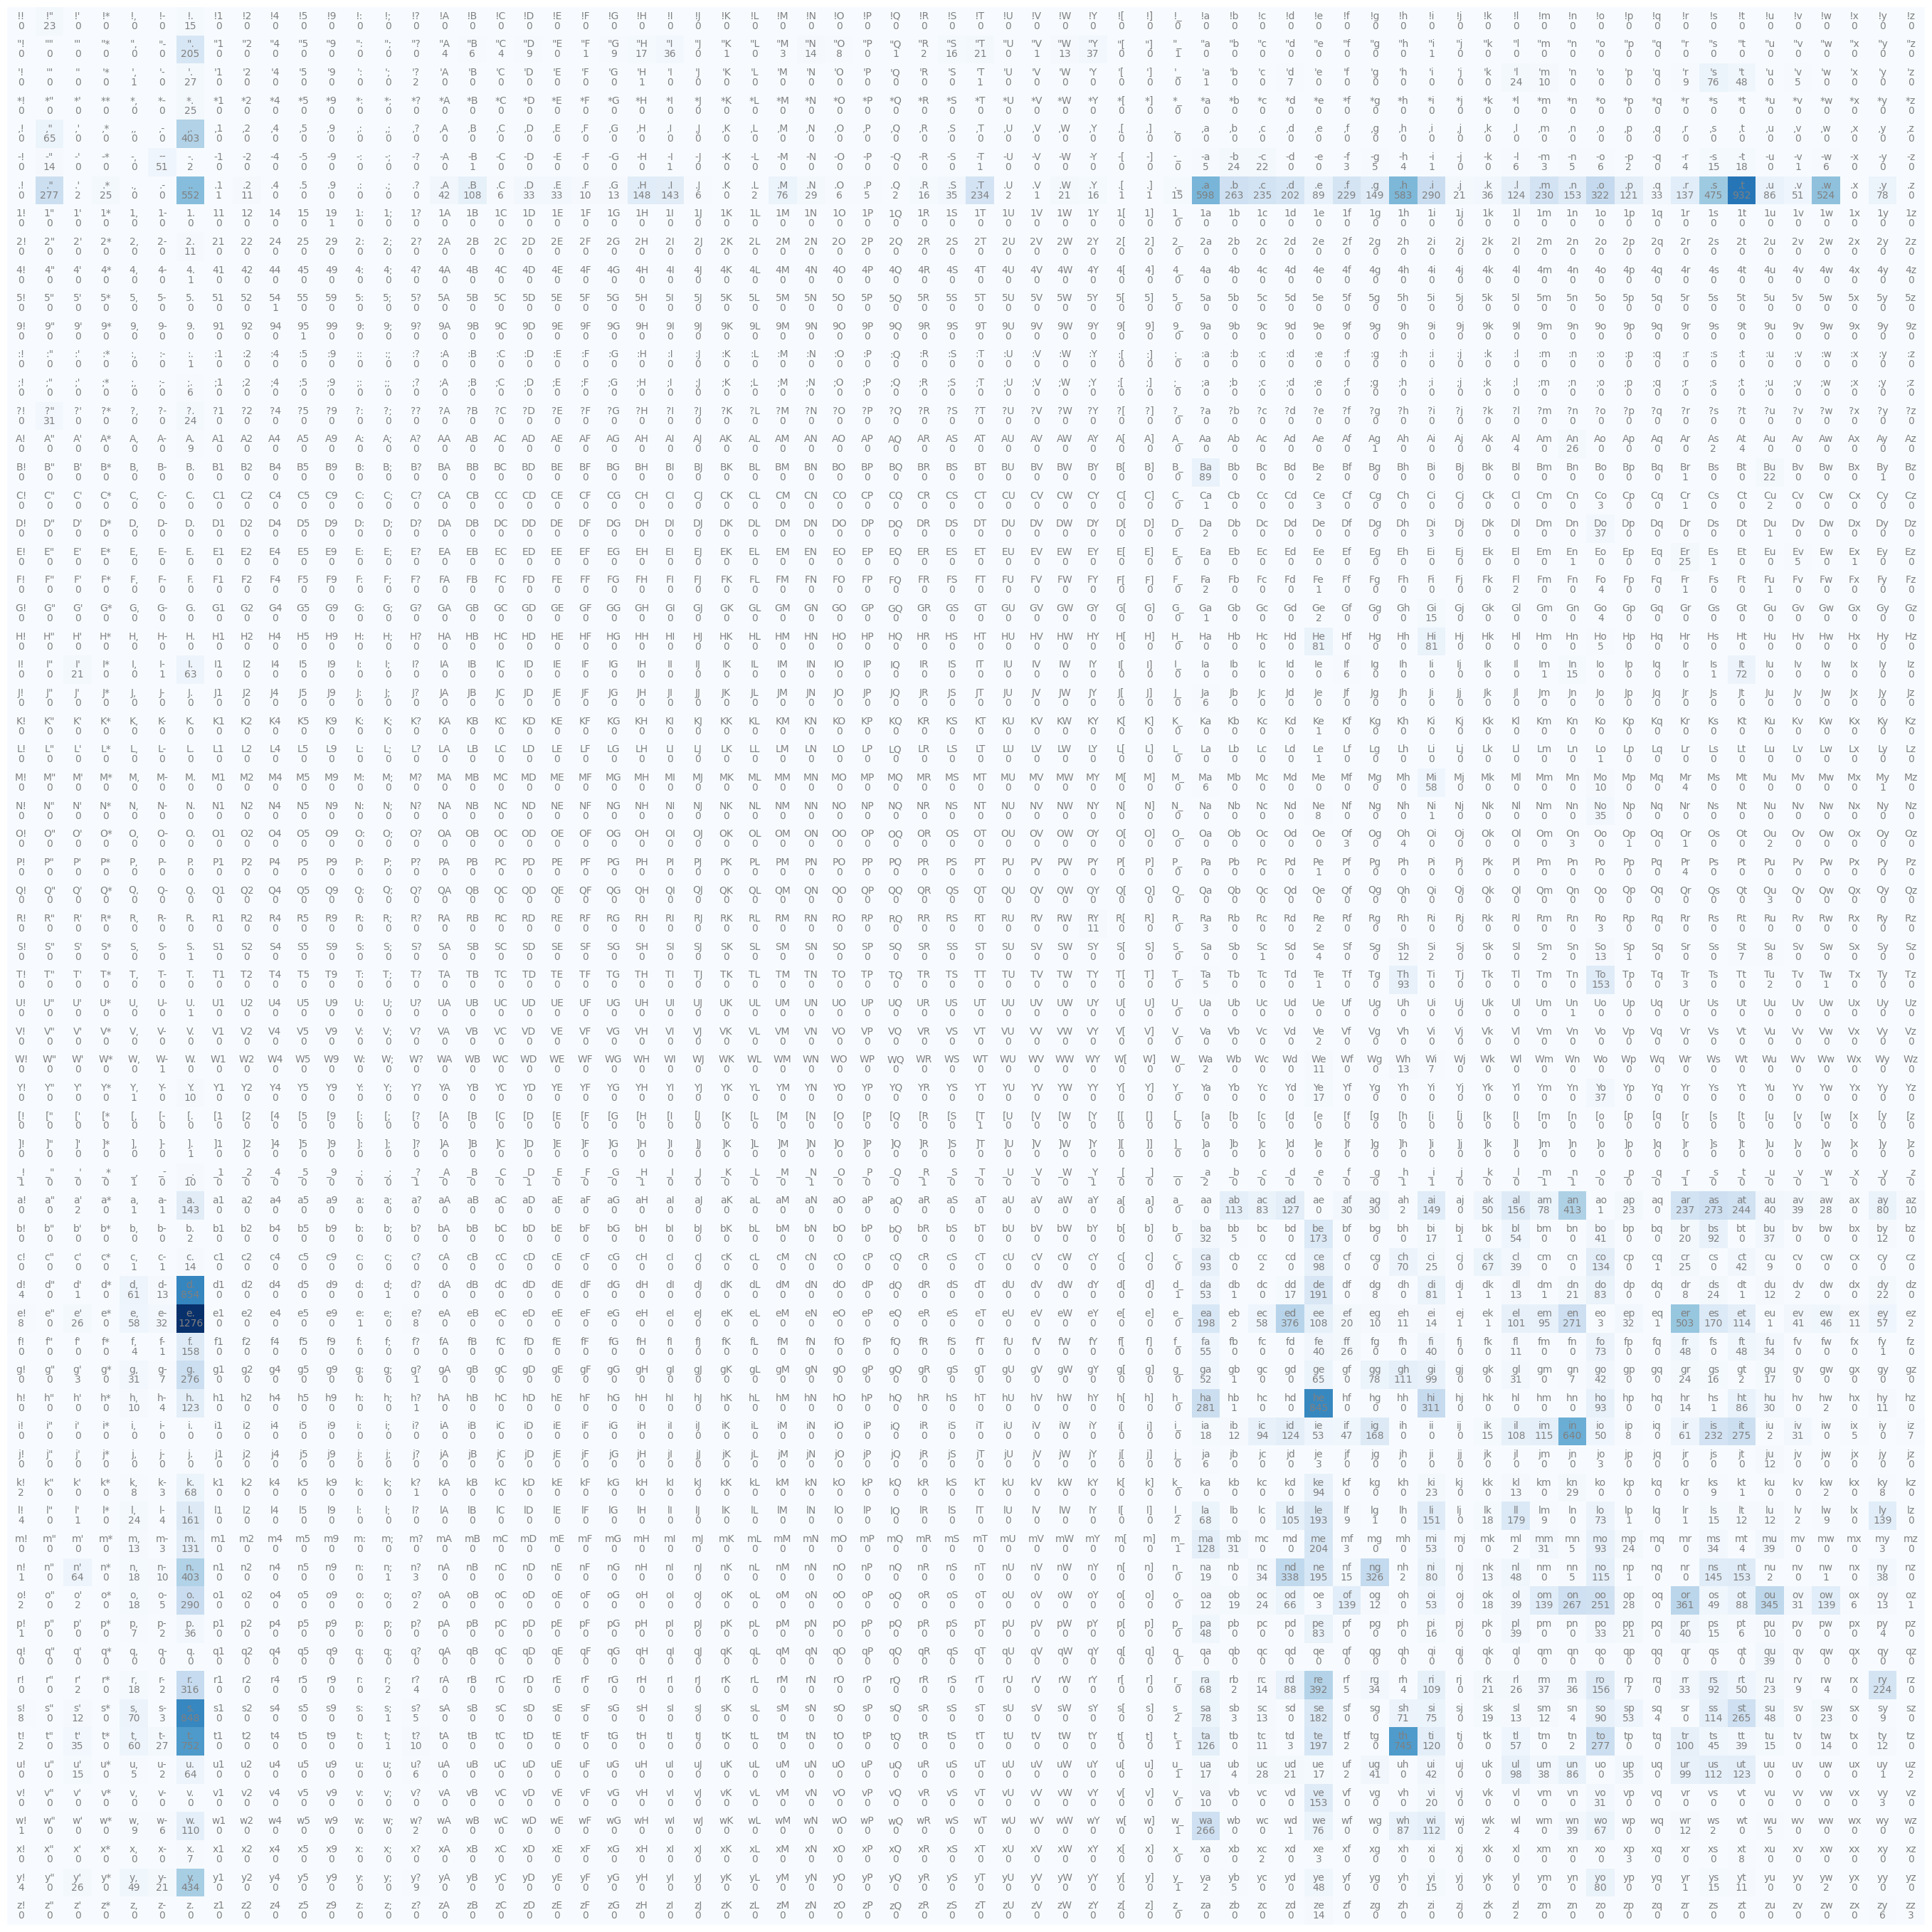

In [22]:
%matplotlib inline

plt.figure(figsize=(35, 35))
plt.imshow(torch_bigrams, cmap="Blues")

# labelling the tags in the plt
for i in range(68):
    for j in range(68):
        character_string = int_to_str[i]+int_to_str[j]
        # torch_bigrams[i, j].item() # Used 
        # print(f"( {character_string} ) ---> {torch_bigrams[i, j]}")
        plt.text(j, i, character_string, ha="center", va="bottom", color="gray")
        plt.text(j, i, torch_bigrams[i, j].item(), ha="center", va="top", color="gray")
        
plt.axis('off')
plt.show()